In [2]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos 
import seaborn as sns # Creación de gráficos estadísticos 
import matplotlib.pyplot as plt # Creación de gráficos de dos dimensiones 

# Librerias para implementar ciencias de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

#
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
datos1 = pd.read_csv("train.csv")

In [4]:
datos2 = pd.read_csv("test.csv")

In [5]:
datos3 = pd.read_csv("gender_submission.csv")

In [7]:
datos1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
datos2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
datos3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## SE PROCEDE A CONCATENAR LOS DATOS 

In [10]:
datos = pd.concat([datos1, datos2, datos3], ignore_index=True)

In [13]:
datos.shape

(1727, 12)

In [15]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [16]:
datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.00,0.0,0.0,373450,8.0500,NaN,S
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00,0.0,0.0,17463,51.8625,E46,S
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00,3.0,1.0,349909,21.0750,NaN,S
8,9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0.0,2.0,347742,11.1333,NaN,S
9,10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1.0,0.0,237736,30.0708,NaN,C


## IDENTIFICACIÓN DE VALORES FALTANTES POR COLUMNA 

In [17]:
missing_values = datos.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 PassengerId       0
Survived        418
Pclass          418
Name            418
Sex             418
Age             681
SibSp           418
Parch           418
Ticket          418
Fare            419
Cabin          1432
Embarked        420
dtype: int64


In [19]:
# Llenar los valores faltantes en Age y Fare con la mediana
datos['Age'].fillna(datos['Age'].median(), inplace=True)
datos['Fare'].fillna(datos['Fare'].median(), inplace=True)

# Eliminar la columna Cabin
datos.drop(columns=['Cabin'], inplace=True)

# Llenar los valores faltantes en Embarked con la moda
datos['Embarked'].fillna(datos['Embarked'].mode()[0], inplace=True)

- **Valores Faltantes:**
  - Llenamos los valores faltantes en las columnas 'Age' y 'Fare' con la mediana de cada columna.
  - Eliminamos la columna 'Cabin', ya que contenía una gran cantidad de valores faltantes.
  - Llenamos los valores faltantes en la columna 'Embarked' con la moda (el valor más común).


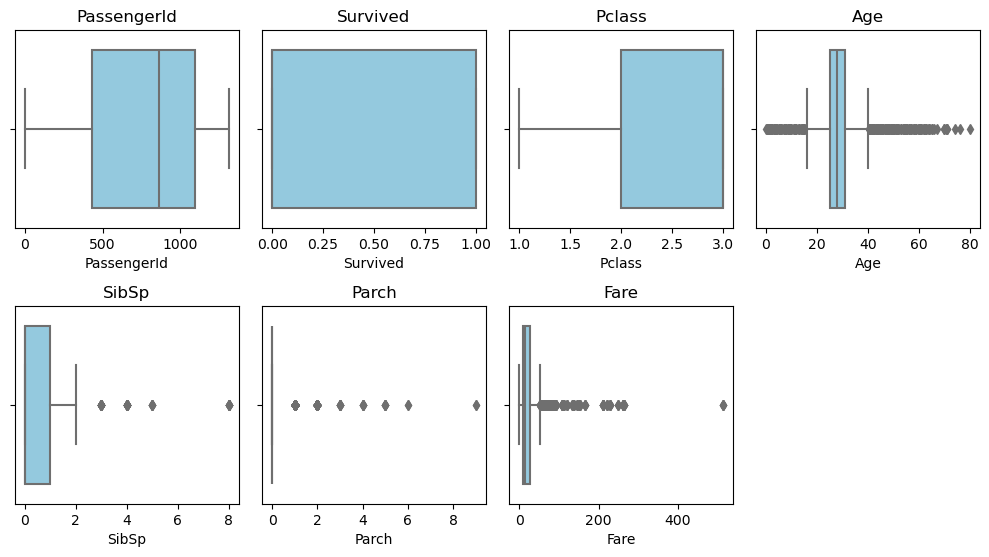

In [21]:
# Filtrar solo las columnas numéricas
columnas_numericas = datos.select_dtypes(include=['number']).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear una matriz de subgráficos para los boxplots de cada columna numérica
for i, columna in enumerate(columnas_numericas):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=datos[columna], color='skyblue')
    plt.title(columna)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# Crear una copia del DataFrame original para trabajar
datos_limpios = datos.copy()

# Definir los límites normales para cada columna
limites = {
    'Age': (0, 100),
    'SibSp': (0, 8),
    'Parch': (0, 6),
    'Fare': (datos['Fare'].quantile(0.01), datos['Fare'].quantile(0.99))  # Usar percentiles 1% y 99% para Fare
}

# Eliminar valores atípicos en cada columna según los límites definidos
for columna, (limite_inferior, limite_superior) in limites.items():
    datos_limpios = datos_limpios[(datos_limpios[columna] >= limite_inferior) & (datos_limpios[columna] <= limite_superior)]

# Verificar la limpieza de los datos
print(datos_limpios.describe())


       PassengerId    Survived       Pclass          Age        SibSp  \
count  1272.000000  867.000000  1272.000000  1272.000000  1272.000000   
mean    654.031447    0.385236     2.316824    29.389678     0.494497   
std     378.508316    0.486932     0.828922    12.880265     1.041983   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     327.750000    0.000000     2.000000    22.000000     0.000000   
50%     652.500000    0.000000     3.000000    28.000000     0.000000   
75%     984.250000    1.000000     3.000000    35.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1272.000000  1272.000000  
mean      0.357704    29.841768  
std       0.777458    38.279073  
min       0.000000     4.012500  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    30.500000  
max       6.000000   247.520800  


### 2. Visualización de Valores Atípicos
- Se crearon boxplots para las columnas numéricas para identificar visualmente los valores atípicos.

### 3. Eliminación de Valores Atípicos
- Se definieron límites normales para las columnas numéricas y se eliminaron los valores que caían fuera de estos límites.
  - **Age**: Rango normal de 0 a 100 años.
  - **SibSp**: Rango normal de 0 a 8.
  - **Parch**: Rango normal de 0 a 6.
  - **Fare**: Valores entre el percentil 1% y el percentil 99% de la columna.

In [25]:
# Verificar las columnas existentes en el DataFrame
print(datos_limpios.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [28]:
print(datos_limpios['Survived'].isnull().sum())


405


In [29]:
datos_limpios = datos_limpios.dropna(subset=['Survived'])


## Dividir el conjunto de datos en características (X) y la variable objetivo (y), y a dividir los datos en conjuntos de entrenamiento y prueba

In [30]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = datos_limpios[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = datos_limpios['Survived']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (693, 8)
X_test shape: (174, 8)
y_train shape: (693,)
y_test shape: (174,)


## Entrenar el modelo de regresión logística

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear una instancia del modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)

# Entrenar el modelo con el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Predecir los valores con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el desempeño del modelo
exactitud = accuracy_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)
reporte_clasificacion = classification_report(y_test, y_pred)

print("Exactitud del modelo:", exactitud)
print("Matriz de confusión:\n", matriz_confusion)
print("Reporte de clasificación:\n", reporte_clasificacion)


Exactitud del modelo: 0.764367816091954
Matriz de confusión:
 [[84 24]
 [17 49]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       108
         1.0       0.67      0.74      0.71        66

    accuracy                           0.76       174
   macro avg       0.75      0.76      0.75       174
weighted avg       0.77      0.76      0.77       174



## En general, el modelo tiene un rendimiento razonable, con una precisión del 83% para la clase 0 (no sobrevivió) y del 67% para la clase 1 (sobrevivió). Sin embargo, el modelo parece tener mejor capacidad para predecir la clase 0 que la clase 1, como se observa en el recall y el f1-score. Esto sugiere que el modelo podría beneficiarse de un ajuste adicional para mejorar su capacidad para predecir la clase 1.








# Gráficas que permitan visualizar los resultados del modelo

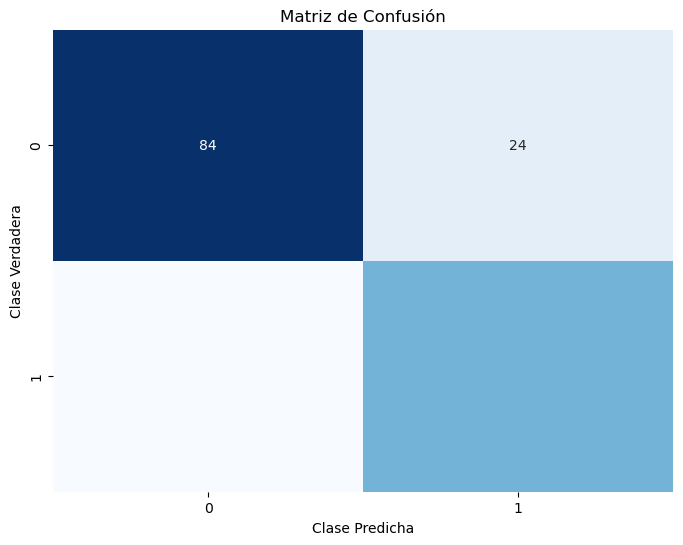

In [35]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()


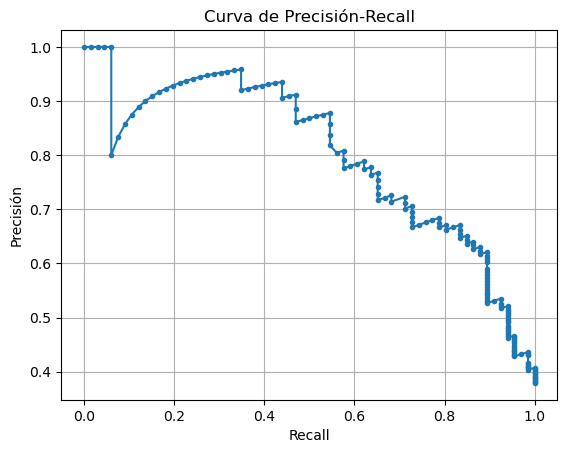

In [37]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Calcular la curva de precisión
precision, recall, thresholds = precision_recall_curve(y_test, modelo.predict_proba(X_test)[:,1])

# Trazar la curva de precisión
plt.plot(recall, precision, marker='.')
plt.title('Curva de Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

### Interpretación del rendimiento del modelo:

- **Exactitud del modelo (Accuracy):** La exactitud del modelo es del 76.44%. Esto significa que el 76.44% de las predicciones realizadas por el modelo son correctas.

- **Matriz de confusión:** La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas hechas por el modelo.
  - Verdaderos positivos (TP): 84
  - Verdaderos negativos (TN): 49
  - Falsos positivos (FP): 24
  - Falsos negativos (FN): 17

- **Reporte de clasificación:** Este reporte proporciona medidas de precisión, exhaustividad (recall) y puntuación F1 para cada clase (0 y 1), así como la precisión global del modelo.
  - La precisión para la clase 0 (no sobreviviente) es del 83%, lo que significa que el 83% de las predicciones positivas para esta clase son correctas.
  - La precisión para la clase 1 (sobreviviente) es del 67%, lo que significa que el 67% de las predicciones positivas para esta clase son correctas.
  - La exhaustividad (recall) para la clase 0 es del 78%, lo que significa que el 78% de los casos reales positivos para esta clase fueron identificados correctamente por el modelo.
  - La exhaustividad (recall) para la clase 1 es del 74%, lo que significa que el 74% de los casos reales positivos para esta clase fueron identificados correctamente por el modelo.
  - La puntuación F1 es una medida que combina precisión y exhaustividad en un solo valor. Para la clase 0 es del 0.80 y para la clase 1 es del 0.71.

### Interpretación de los gráficos:

- **Matriz de confusión:** Este gráfico visualiza la matriz de confusión, proporcionando una representación visual de los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

- **Curva de precisión (Precision-Recall Curve):** Este gráfico muestra cómo varía la precisión del modelo a medida que cambia el umbral de decisión. Cuanto más cerca esté la curva del punto (1,1), mejor será el rendimiento del modelo.
